Data from london.gov on ecological / carbon / greenhouse gas footprint for London boroughs

In [23]:
data_url = 'https://data.london.gov.uk/dataset/environmental-footprint-data-borough'

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import folium
import json

In [4]:
eeorig = pd.read_csv('environmental-footprint-data.csv')

eeorig.head()

,Code,Area,Ecological Footprint (gha/capita) - 2004,Carbon Footprint (tonnes CO2/capita) - 2004,GHG Footprint (tonnes CO2eq/capita) - 2004
0,00AA,City of London,7.18,15.25,21.15
1,00AB,Barking & Dagenham,4.77,10.54,14.44
2,00AC,Barnet,5.86,13.02,17.73
3,00AD,Bexley,5.32,11.82,16.16
4,00AE,Brent,5.02,11.28,15.29


In [5]:
eeorig.tail()

,Code,Area,Ecological Footprint (gha/capita) - 2004,Carbon Footprint (tonnes CO2/capita) - 2004,GHG Footprint (tonnes CO2eq/capita) - 2004
42,924,Wales,5.03,11.60,15.66
43,923,Scotland,5.34,12.16,16.46
44,922,Northern Ireland,4.85,11.18,15.09
45,926,UK,5.30,12.08,16.34
46,NaN,NaN,NaN,NaN,NaN


In [6]:
eeorig.shape

(47, 5)

In [7]:
eeorig.head(40)

,Code,Area,Ecological Footprint (gha/capita) - 2004,Carbon Footprint (tonnes CO2/capita) - 2004,GHG Footprint (tonnes CO2eq/capita) - 2004
0,00AA,City of London,7.18,15.25,21.15
1,00AB,Barking & Dagenham,4.77,10.54,14.44
2,00AC,Barnet,5.86,13.02,17.73
3,00AD,Bexley,5.32,11.82,16.16
4,00AE,Brent,5.02,11.28,15.29
5,00AF,Bromley,5.96,13.22,18.05
6,00AG,Camden,5.68,12.32,16.95
7,00AH,Croydon,5.60,12.40,16.94
8,00AJ,Ealing,5.34,11.83,16.14
9,00AK,Enfield,5.37,11.94,16.27


In [8]:
eeedit = eeorig.iloc[:33, :]

eeedit.tail()

,Code,Area,Ecological Footprint (gha/capita) - 2004,Carbon Footprint (tonnes CO2/capita) - 2004,GHG Footprint (tonnes CO2eq/capita) - 2004
28,00BF,Sutton,5.67,12.55,17.17
29,00BG,Tower Hamlets,4.79,10.52,14.42
30,00BH,Waltham Forest,5.15,11.45,15.62
31,00BJ,Wandsworth,5.88,12.92,17.64
32,00BK,Westminster,6.25,13.49,18.61


In [9]:
eeedit.rename(index=str, columns={"Ecological Footprint (gha/capita) - 2004" : "Eco",
                                  "Carbon Footprint (tonnes CO2/capita) - 2004" : "Carbon",
                                  "GHG Footprint (tonnes CO2eq/capita) - 2004" : "Greenhouse"
                                  }, inplace=True)

eeedit.head()

C:\Users\liamk\Anaconda3\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Code,Area,Eco,Carbon,Greenhouse
0,00AA,City of London,7.18,15.25,21.15
1,00AB,Barking & Dagenham,4.77,10.54,14.44
2,00AC,Barnet,5.86,13.02,17.73
3,00AD,Bexley,5.32,11.82,16.16
4,00AE,Brent,5.02,11.28,15.29


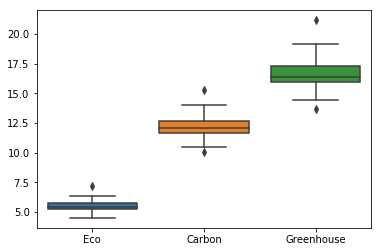

In [10]:
sns.boxplot(data=eeedit)

In [11]:
eeten = eeedit.iloc[:10,:] # testing swarmplot

eeten.head()

,Code,Area,Eco,Carbon,Greenhouse
0,00AA,City of London,7.18,15.25,21.15
1,00AB,Barking & Dagenham,4.77,10.54,14.44
2,00AC,Barnet,5.86,13.02,17.73
3,00AD,Bexley,5.32,11.82,16.16
4,00AE,Brent,5.02,11.28,15.29


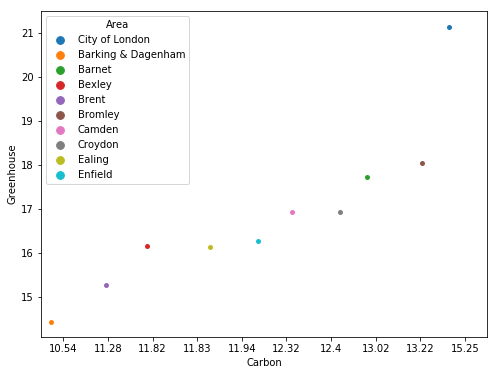

In [12]:
plt.figure(figsize = (8,6))

sns.swarmplot(x="Carbon", y="Greenhouse", data=eeten, hue="Area",dodge=True)

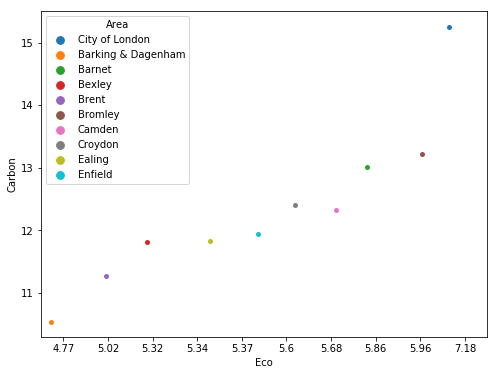

In [13]:
plt.figure(figsize= (8,6))

sns.swarmplot(x="Eco", y="Carbon", data=eeten, hue="Area", dodge=True)

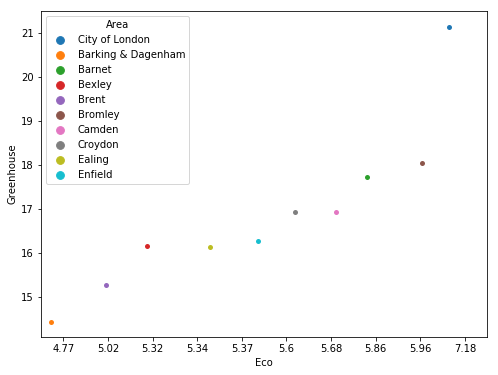

In [14]:
plt.figure(figsize= (8,6))

sns.swarmplot(x="Eco", y="Greenhouse", data=eeten, hue="Area", dodge=True)

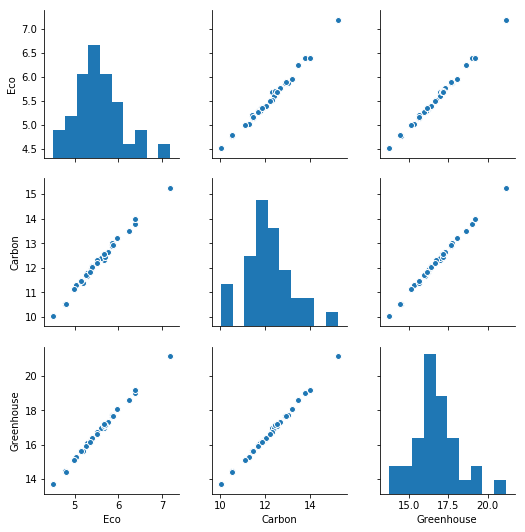

In [22]:
sns.pairplot(eeedit)
# Looks that eco-carbon-greenhouse lvls are consistent

In [15]:
eeedit.head()

,Code,Area,Eco,Carbon,Greenhouse
0,00AA,City of London,7.18,15.25,21.15
1,00AB,Barking & Dagenham,4.77,10.54,14.44
2,00AC,Barnet,5.86,13.02,17.73
3,00AD,Bexley,5.32,11.82,16.16
4,00AE,Brent,5.02,11.28,15.29


In [16]:
eemap = eeedit.iloc[:, 1:3] #shortened version used for mapping

eemap.head()

,Area,Eco
0,City of London,7.18
1,Barking & Dagenham,4.77
2,Barnet,5.86
3,Bexley,5.32
4,Brent,5.02


In [17]:
back_map = folium.Map(
    [51.4571, -0.1231],
    zoom_start=11,
    tiles='Stamen Terrain'
    )

lon_geo = r'inner-london.json'

outlon_geo = r'outer-london.json'

lon_map = folium.Map(location=[51.4571, -0.1231], zoom_start=12)


lon_map.choropleth(geo_data=lon_geo, data=eemap,
             columns=['Area', 'Eco'],
             key_on='feature.properties.Designated',
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Inner London')

lon_map.choropleth(geo_data=outlon_geo, data=eemap,
             columns=['Area', 'Eco'],
             key_on='feature.properties.Designated',
             fill_color='RdPu', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Outer London')
             
lon_map

# Verify inner & outer London maps are rendering correctly

In [18]:
back_map = folium.Map(
    [51.4571, -0.1231],
    zoom_start=11,
    tiles='Stamen Terrain'
    )

split_geo = r'inner-london-split.json'


split_map = folium.Map(location=[51.4571, -0.1231], zoom_start=12)


split_map.choropleth(geo_data=split_geo, data=eemap,
             columns=['Area', 'Eco'],
             key_on='feature.properties.name',
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.5,
             legend_name='Inner London')

        
split_map

# Rendering South London eco levels

In [20]:
eeorig.head(10)

,Code,Area,Ecological Footprint (gha/capita) - 2004,Carbon Footprint (tonnes CO2/capita) - 2004,GHG Footprint (tonnes CO2eq/capita) - 2004
0,00AA,City of London,7.18,15.25,21.15
1,00AB,Barking & Dagenham,4.77,10.54,14.44
2,00AC,Barnet,5.86,13.02,17.73
3,00AD,Bexley,5.32,11.82,16.16
4,00AE,Brent,5.02,11.28,15.29
5,00AF,Bromley,5.96,13.22,18.05
6,00AG,Camden,5.68,12.32,16.95
7,00AH,Croydon,5.60,12.40,16.94
8,00AJ,Ealing,5.34,11.83,16.14
9,00AK,Enfield,5.37,11.94,16.27


In [ ]:
# Will revisit